Target classes: ['B' 'M']
Shape of X: (569, 30)
Shape of y: (569,)


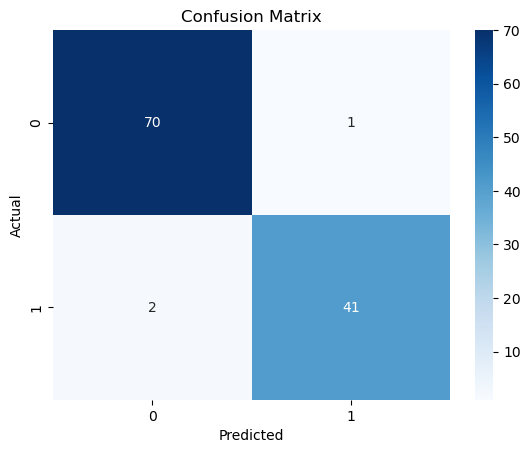


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Precision: 0.98
Recall:    0.95


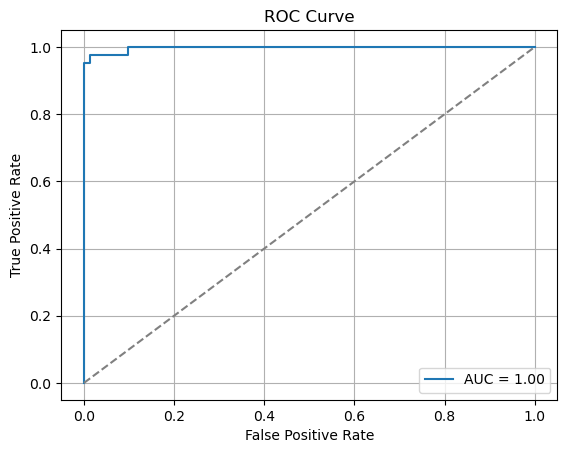

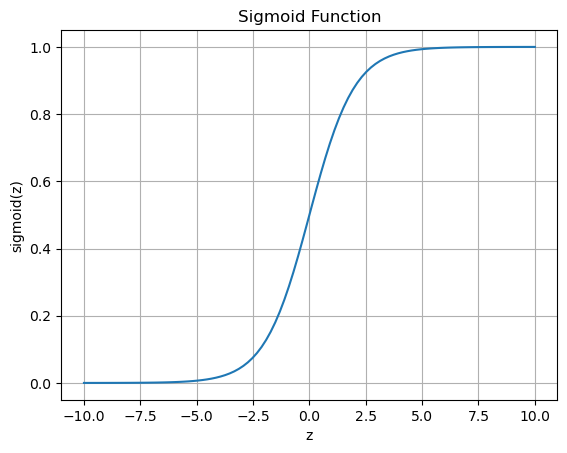


Confusion Matrix with threshold 0.6:
[[71  0]
 [ 2 41]]
Precision: 1.0
Recall:    0.9534883720930233


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve, precision_score, recall_score
)
from scipy.special import expit 
df = pd.read_csv("data.csv")
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)
if 'Unnamed: 32' in df.columns:
    df.drop(columns=['Unnamed: 32'], inplace=True)
target_column = 'diagnosis'  
df = df.dropna(subset=[target_column])
le = LabelEncoder()
df[target_column] = le.fit_transform(df[target_column])
print(f"Target classes: {le.classes_}")  
X = df.drop(columns=[target_column])
y = df[target_column]
X = X.select_dtypes(include=[np.number])

# Final check
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Step 6: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 7: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Train Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 9: Predict and evaluate
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Precision & Recall
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall:    {recall_score(y_test, y_pred):.2f}")

# ROC Curve & AUC
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

# Step 10: Sigmoid function visualization
z = np.linspace(-10, 10, 100)
sigmoid = expit(z)
plt.plot(z, sigmoid)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid()
plt.show()

# Step 11: Threshold tuning example
threshold = 0.6
y_custom_pred = (y_prob >= threshold).astype(int)
cm_thresh = confusion_matrix(y_test, y_custom_pred)

print(f"\nConfusion Matrix with threshold {threshold}:")
print(cm_thresh)
print("Precision:", precision_score(y_test, y_custom_pred))
print("Recall:   ", recall_score(y_test, y_custom_pred))
